<a href="https://colab.research.google.com/github/RasheedKhan123/Machine-Learning/blob/main/Playing-with-predictions-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**Reading the data from the URL**    [monkeyPoxDataset](https://raw.githubusercontent.com/owid/monkeypox/main/owid-monkeypox-data.csv)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/monkeypox/main/owid-monkeypox-data.csv', header=0, delimiter=",")#on_bad_lines='skip'

In [ ]:
df

,location,iso_code,date,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
0,Africa,OWID_AFR,2022-05-01,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000
1,Africa,OWID_AFR,2022-05-02,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000
2,Africa,OWID_AFR,2022-05-03,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000
3,Africa,OWID_AFR,2022-05-04,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000
4,Africa,OWID_AFR,2022-05-05,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33663,World,OWID_WRL,2023-05-05,87366.0,140.0,4.0,0.0,17.00,1.71,0.001,10.955,0.002,0.0,0.01755,0.00021
33664,World,OWID_WRL,2023-05-06,87366.0,140.0,0.0,0.0,17.00,1.71,0.000,10.955,0.002,0.0,0.01755,0.00021
33665,World,OWID_WRL,2023-05-07,87377.0,140.0,11.0,0.0,15.14,1.71,0.001,10.956,0.002,0.0,0.01755,0.00021
33666,World,OWID_WRL,2023-05-08,87377.0,140.0,0.0,0.0,12.57,1.71,0.000,10.956,0.002,0.0,0.01755,0.00021


**Now let us have a look at the data.**

In [ ]:
df.isna().sum()

location                           0
iso_code                           0
date                               0
total_cases                        0
total_deaths                       0
new_cases                          0
new_deaths                         0
new_cases_smoothed                 0
new_deaths_smoothed                0
new_cases_per_million              0
total_cases_per_million            0
new_cases_smoothed_per_million     0
new_deaths_per_million             0
total_deaths_per_million           0
new_deaths_smoothed_per_million    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         33668 non-null  object 
 1   iso_code                         33668 non-null  object 
 2   date                             33668 non-null  object 
 3   total_cases                      33668 non-null  float64
 4   total_deaths                     33668 non-null  float64
 5   new_cases                        33668 non-null  float64
 6   new_deaths                       33668 non-null  float64
 7   new_cases_smoothed               33668 non-null  float64
 8   new_deaths_smoothed              33668 non-null  float64
 9   new_cases_per_million            33668 non-null  float64
 10  total_cases_per_million          33668 non-null  float64
 11  new_cases_smoothed_per_million   33668 non-null  float64
 12  new_deaths_per_mil

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.sum().value_counts

<bound method IndexOpsMixin.value_counts of location                           AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...
iso_code                           OWID_AFROWID_AFROWID_AFROWID_AFROWID_AFROWID_A...
date                               2022-05-012022-05-022022-05-032022-05-042022-0...
total_cases                                                               65274007.0
total_deaths                                                                 57518.0
new_cases                                                                   262050.0
new_deaths                                                                     414.0
new_cases_smoothed                                                         261962.69
new_deaths_smoothed                                                           408.03
new_cases_per_million                                                       2634.681
total_cases_per_million                                                   664095.052
new_cases_smoothed_pe

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,33668.0,1938.755109,8459.067224,0.0,4.00000,21.000,257.00000,87377.00000
total_deaths,33668.0,1.708388,8.497725,0.0,0.00000,0.000,0.00000,140.00000
new_cases,33668.0,7.783355,63.684197,0.0,0.00000,0.000,0.00000,1802.00000
new_deaths,33668.0,0.012297,0.216696,0.0,0.00000,0.000,0.00000,12.00000
new_cases_smoothed,33668.0,7.780762,49.288145,0.0,0.00000,0.000,0.57000,1089.14000
new_deaths_smoothed,33668.0,0.012119,0.088664,0.0,0.00000,0.000,0.00000,1.71000
new_cases_per_million,33668.0,0.078255,0.923778,0.0,0.00000,0.000,0.00000,91.80800
total_cases_per_million,33668.0,19.724814,30.910391,0.0,0.67975,4.878,29.35475,183.61500
new_cases_smoothed_per_million,33668.0,0.077842,0.394279,0.0,0.00000,0.000,0.02500,17.44300
new_deaths_per_million,33668.0,0.000081,0.002657,0.0,0.00000,0.000,0.00000,0.22683



**Encoding the data**

Using LabelEncoder we will encode the column of iso code and add this column to the dataframe. This encoders will classify the codes into groups.

In [ ]:
le = LabelEncoder()
encoded_data = le.fit_transform(df.iso_code)

In [ ]:
df['iso_code_encoded_data'] = encoded_data
df

,location,iso_code,date,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,iso_code_encoded_data
0,Africa,OWID_AFR,2022-05-01,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83
1,Africa,OWID_AFR,2022-05-02,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83
2,Africa,OWID_AFR,2022-05-03,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83
3,Africa,OWID_AFR,2022-05-04,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83
4,Africa,OWID_AFR,2022-05-05,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33663,World,OWID_WRL,2023-05-05,87366.0,140.0,4.0,0.0,17.00,1.71,0.001,10.955,0.002,0.0,0.01755,0.00021,89
33664,World,OWID_WRL,2023-05-06,87366.0,140.0,0.0,0.0,17.00,1.71,0.000,10.955,0.002,0.0,0.01755,0.00021,89
33665,World,OWID_WRL,2023-05-07,87377.0,140.0,11.0,0.0,15.14,1.71,0.001,10.956,0.002,0.0,0.01755,0.00021,89
33666,World,OWID_WRL,2023-05-08,87377.0,140.0,0.0,0.0,12.57,1.71,0.000,10.956,0.002,0.0,0.01755,0.00021,89


**Feature Engineering:**

Here we will extract the date in the form of day, month and year and this data is going to be the numeric data for the dataset. the earlier column of date could be dropped and we will have all the columns in the dataset the same data type

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df.drop('date', axis=1, inplace=True)
df

,location,iso_code,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,iso_code_encoded_data,month,day,year
0,Africa,OWID_AFR,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83,5,1,2022
1,Africa,OWID_AFR,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83,5,2,2022
2,Africa,OWID_AFR,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83,5,3,2022
3,Africa,OWID_AFR,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83,5,4,2022
4,Africa,OWID_AFR,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83,5,5,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33663,World,OWID_WRL,87366.0,140.0,4.0,0.0,17.00,1.71,0.001,10.955,0.002,0.0,0.01755,0.00021,89,5,5,2023
33664,World,OWID_WRL,87366.0,140.0,0.0,0.0,17.00,1.71,0.000,10.955,0.002,0.0,0.01755,0.00021,89,5,6,2023
33665,World,OWID_WRL,87377.0,140.0,11.0,0.0,15.14,1.71,0.001,10.956,0.002,0.0,0.01755,0.00021,89,5,7,2023
33666,World,OWID_WRL,87377.0,140.0,0.0,0.0,12.57,1.71,0.000,10.956,0.002,0.0,0.01755,0.00021,89,5,8,2023


drop the column iso_code as we have added the encoded column and doing this will help us to make the columns of the dataset of same datatype

In [ ]:
df.drop('iso_code', axis=1, inplace=True)
#df.drop('location', axis=1, inplace=True)
# after dropping the iso code column we can observe that the Dtype is float64 for the whole dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33668 entries, 0 to 33667
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         33668 non-null  object 
 1   total_cases                      33668 non-null  float64
 2   total_deaths                     33668 non-null  float64
 3   new_cases                        33668 non-null  float64
 4   new_deaths                       33668 non-null  float64
 5   new_cases_smoothed               33668 non-null  float64
 6   new_deaths_smoothed              33668 non-null  float64
 7   new_cases_per_million            33668 non-null  float64
 8   total_cases_per_million          33668 non-null  float64
 9   new_cases_smoothed_per_million   33668 non-null  float64
 10  new_deaths_per_million           33668 non-null  float64
 11  total_deaths_per_million         33668 non-null  float64
 12  new_deaths_smoothe

**Exploratory Data Analysis**

lets find the day which has maximum number of new cases reported.

In [ ]:
df

,location,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,iso_code_encoded_data,month,day,year
0,Africa,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83,5,1,2022
1,Africa,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83,5,2,2022
2,Africa,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83,5,3,2022
3,Africa,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83,5,4,2022
4,Africa,27.0,2.0,0.0,0.0,0.29,0.00,0.000,0.019,0.000,0.0,0.00140,0.00000,83,5,5,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33663,World,87366.0,140.0,4.0,0.0,17.00,1.71,0.001,10.955,0.002,0.0,0.01755,0.00021,89,5,5,2023
33664,World,87366.0,140.0,0.0,0.0,17.00,1.71,0.000,10.955,0.002,0.0,0.01755,0.00021,89,5,6,2023
33665,World,87377.0,140.0,11.0,0.0,15.14,1.71,0.001,10.956,0.002,0.0,0.01755,0.00021,89,5,7,2023
33666,World,87377.0,140.0,0.0,0.0,12.57,1.71,0.000,10.956,0.002,0.0,0.01755,0.00021,89,5,8,2023


In [ ]:
max_index = df['new_cases'].idxmax()
print(df.loc[max_index])

location                             World
total_cases                        31630.0
total_deaths                          12.0
new_cases                           1802.0
new_deaths                             0.0
new_cases_smoothed                   940.0
new_deaths_smoothed                   0.43
new_cases_per_million                0.226
total_cases_per_million              3.966
new_cases_smoothed_per_million       0.118
new_deaths_per_million                 0.0
total_deaths_per_million            0.0015
new_deaths_smoothed_per_million    0.00005
iso_code_encoded_data                   89
month                                    8
day                                     10
year                                  2022
Name: 33395, dtype: object


lets find the top 5 encoded iso codes with maximum total cases per million.


In [ ]:
sorted_data = df.sort_values(by='total_cases_per_million', ascending=False)
top_5 = sorted_data.head(5)
top_5.iso_code_encoded_data

13859    42
13699    42
13705    42
13704    42
13703    42
Name: iso_code_encoded_data, dtype: int64

Lets have a look for top 5 distinct locations with total active cases

In [ ]:
grouped_data = df.groupby('location')['total_cases'].max()
list(grouped_data.sort_values(ascending=False).head(5).index)

['World', 'North America', 'United States', 'Europe', 'South America']

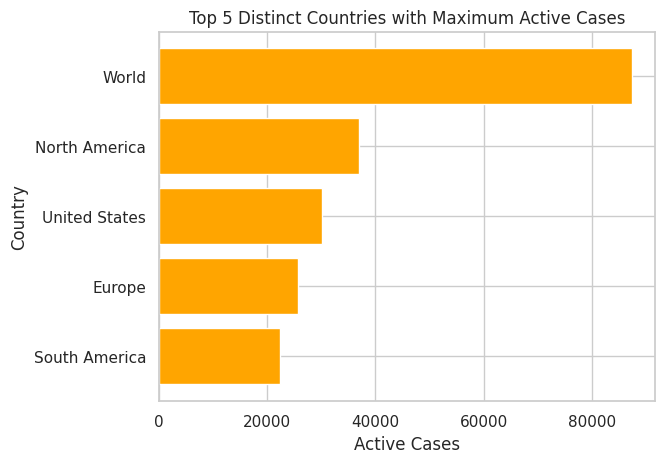

In [ ]:
# Sort the data by the maximum number of active cases in descending order and select the top 5 distinct countries
top_5_countries = grouped_data.sort_values(ascending=False).head(5)

# Create a horizontal bar chart to visualize the data
plt.barh(top_5_countries.index, top_5_countries.values, color='orange')
plt.xlabel('Active Cases')
plt.ylabel('Country')
plt.title('Top 5 Distinct Countries with Maximum Active Cases')
plt.gca().invert_yaxis()
plt.show()

lets find the top 5 encoded iso country codes with maximum deaths

In [ ]:
sorted_data = df.sort_values(by='total_deaths', ascending=False)
top_5 = sorted_data.head(5)
top_5.iso_code_encoded_data

33667    89
33666    89
33665    89
33664    89
33663    89
Name: iso_code_encoded_data, dtype: int64

lets have a look for distinct countries with maximum deaths

In [ ]:
grouped_data = df.groupby('location')['total_deaths'].max()
list(grouped_data.sort_values(ascending=False).head(5).index)

['World', 'North America', 'South America', 'United States', 'Mexico']

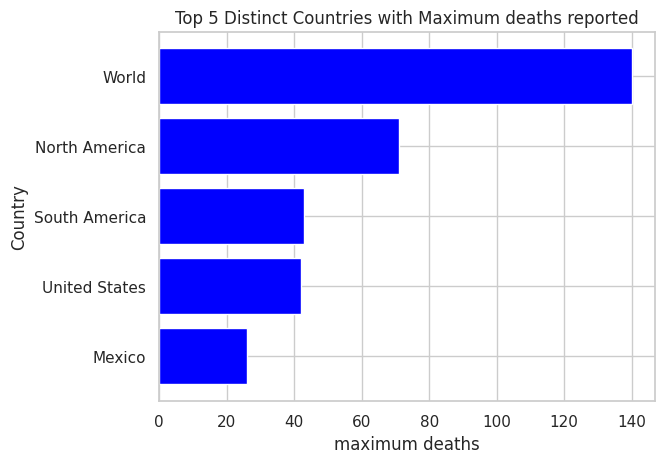

In [ ]:
# Sort the data by the maximum number of active cases in descending order and select the top 5 distinct countries
top_5_countries = grouped_data.sort_values(ascending=False).head(5)

# Create a horizontal bar chart to visualize the data
plt.barh(top_5_countries.index, top_5_countries.values, color='blue')
plt.xlabel('maximum deaths')
plt.ylabel('Country')
plt.title('Top 5 Distinct Countries with Maximum deaths reported')
plt.gca().invert_yaxis()
plt.show()

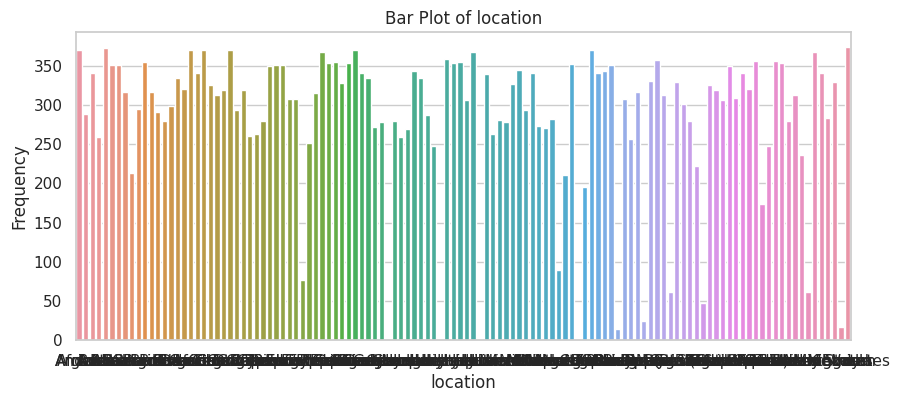

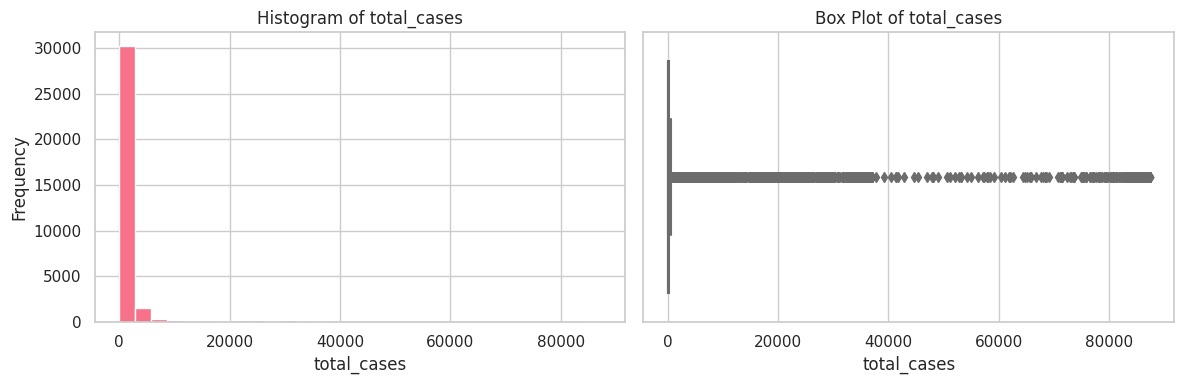

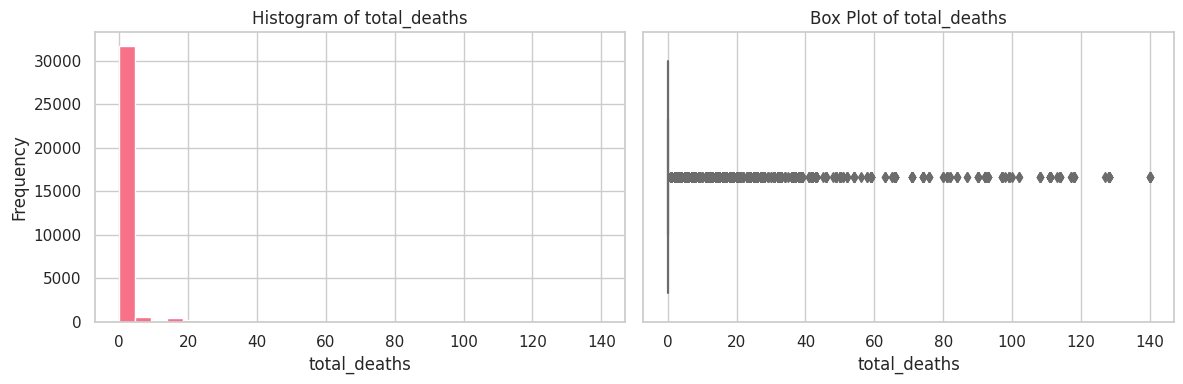

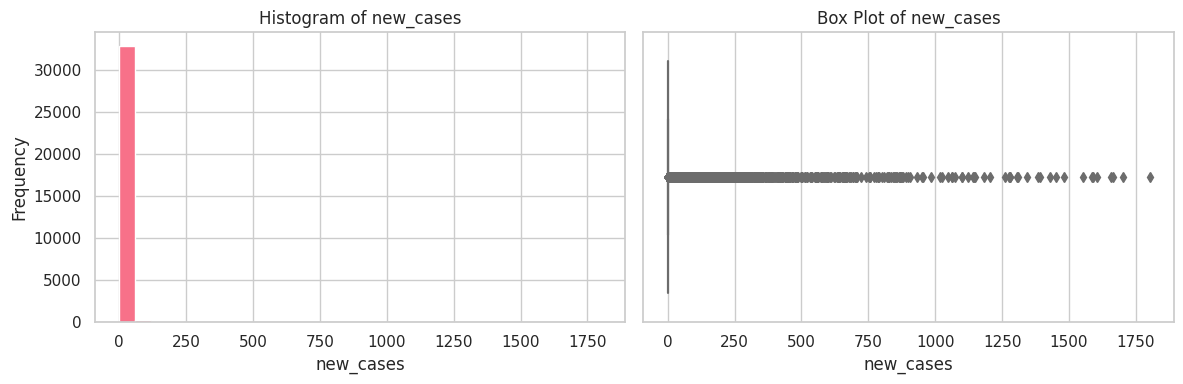

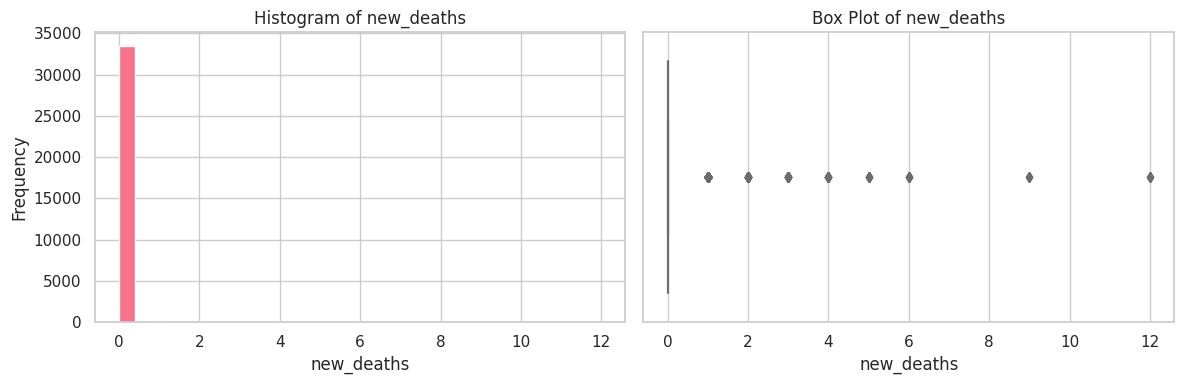

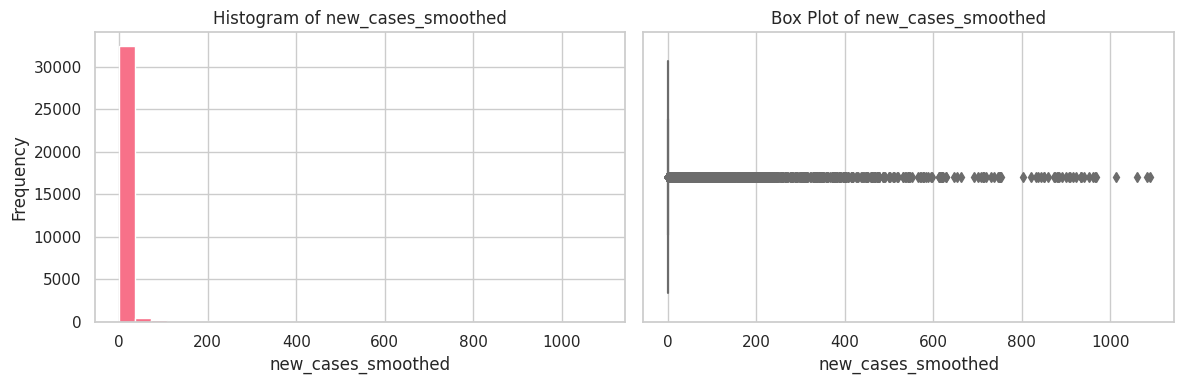

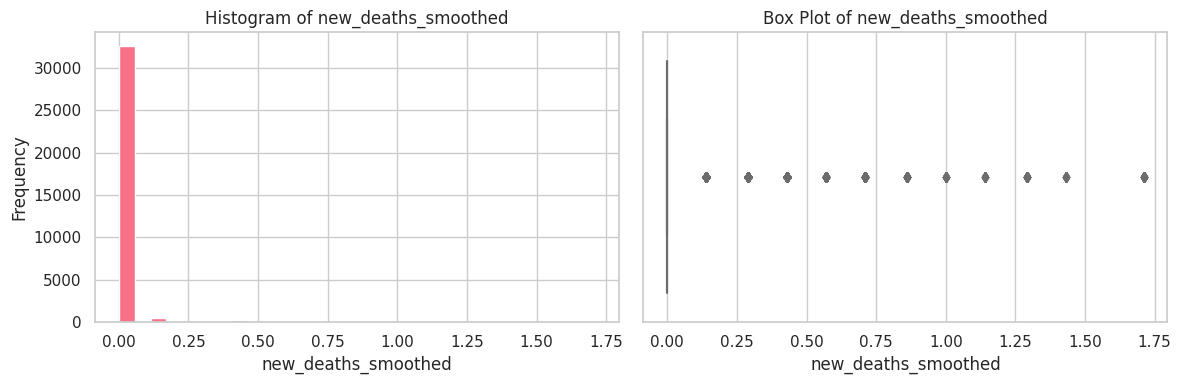

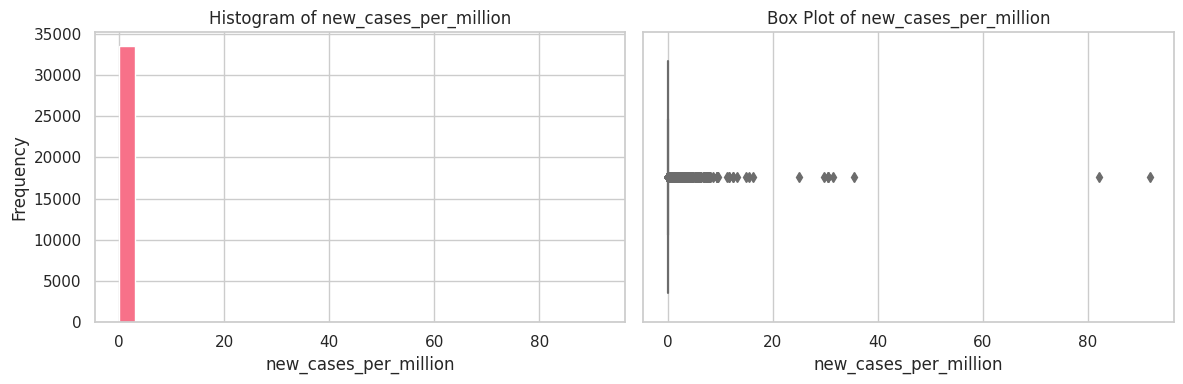

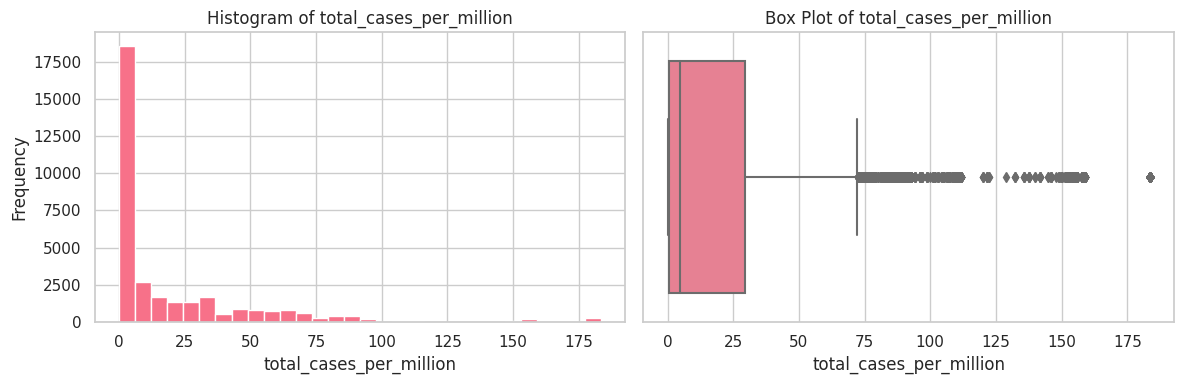

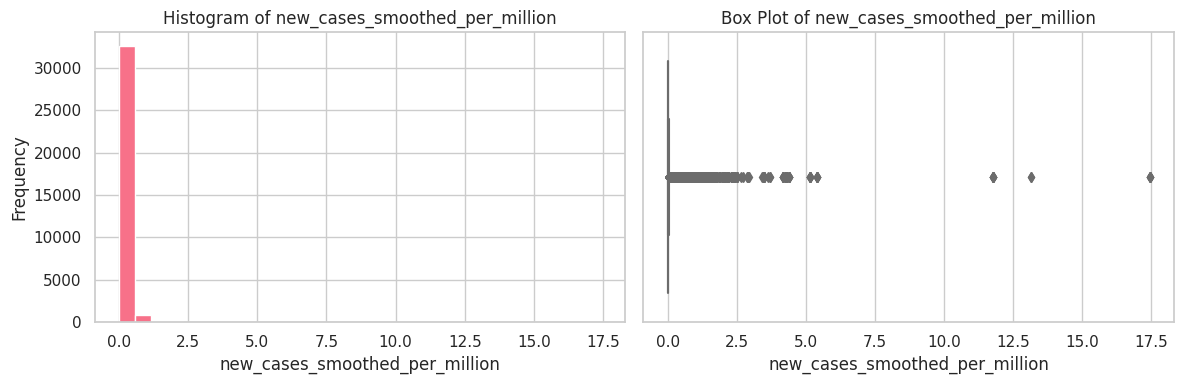

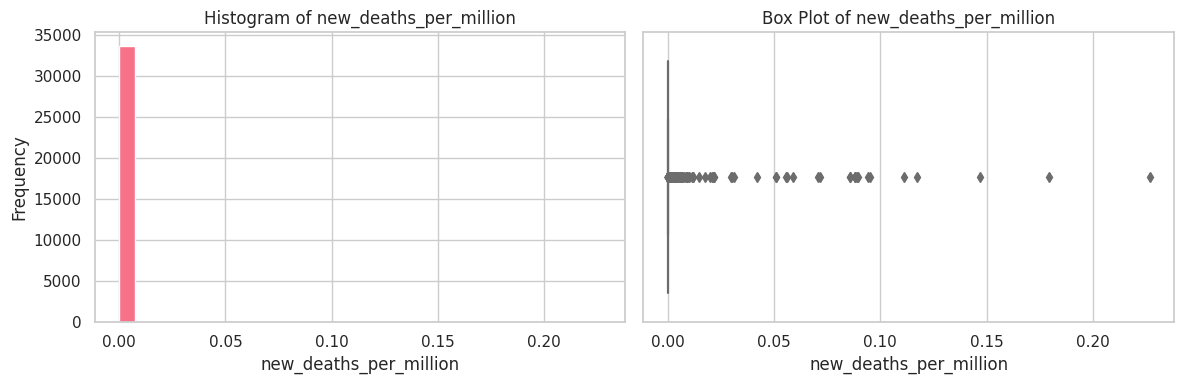

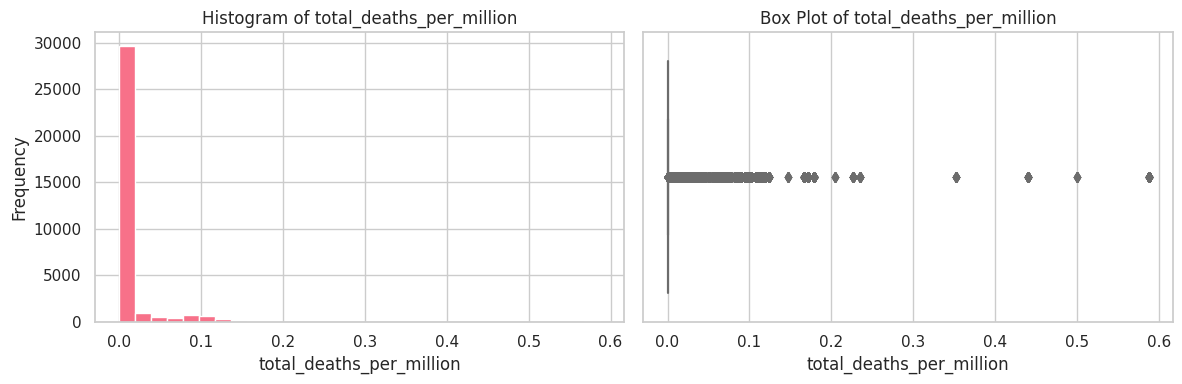

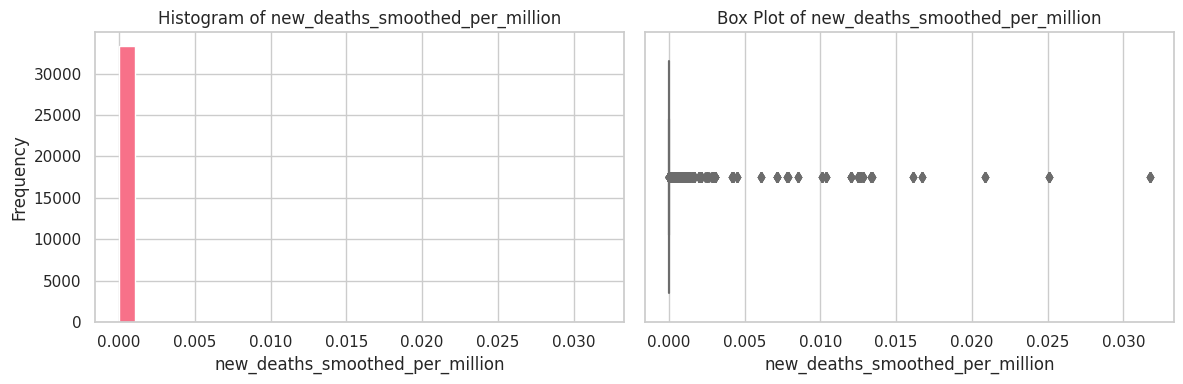

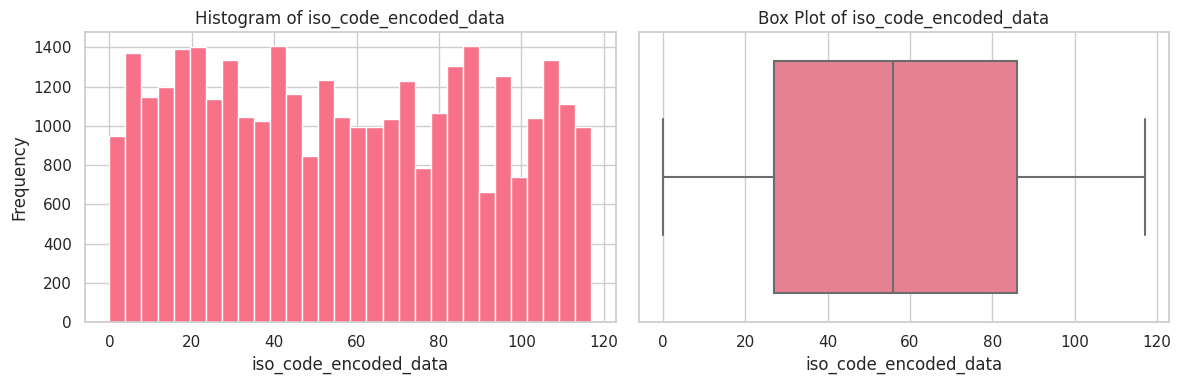

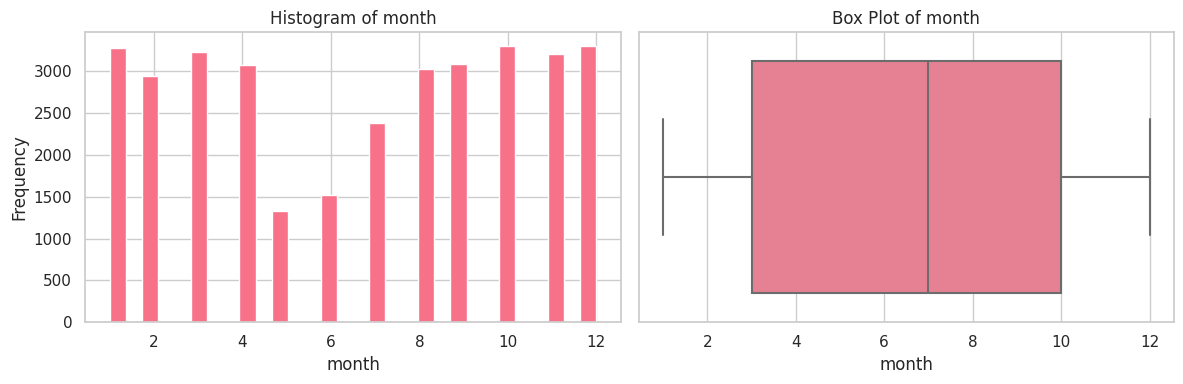

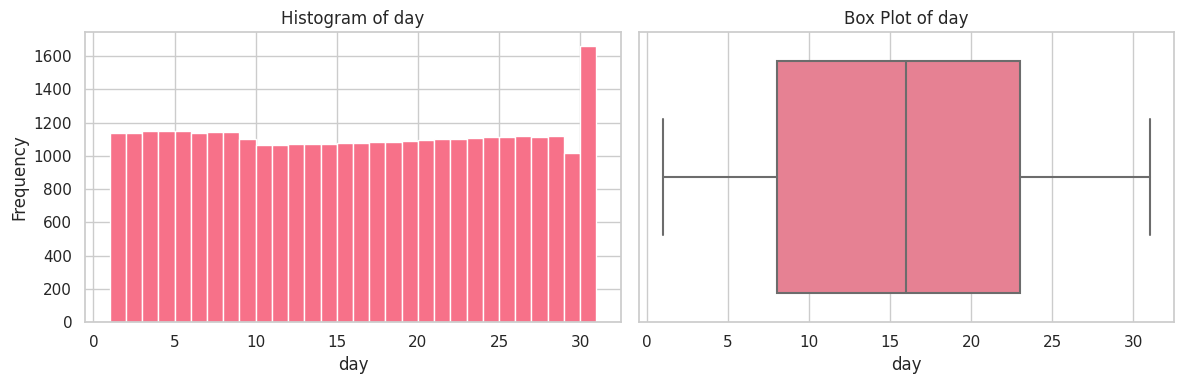

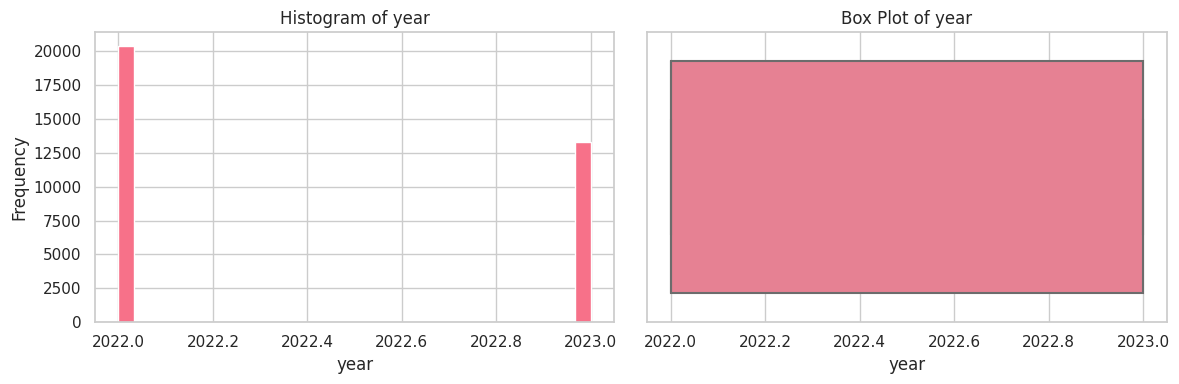

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and color palette
sns.set(style="whitegrid")
sns.set_palette("husl")

# Assuming you have a pandas DataFrame named 'data'
for column in df.columns:
    # If the data is continuous, plot a histogram and a box plot
    if df[column].dtype in ['int64', 'float64']:
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        # Histogram
        axs[0].hist(df[column], bins=30)
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Frequency')
        axs[0].set_title(f'Histogram of {column}')

        # Box plot
        sns.boxplot(x=df[column], ax=axs[1])
        axs[1].set_xlabel(column)
        axs[1].set_title(f'Box Plot of {column}')
        plt.tight_layout()

    # If the data is categorical, plot a bar plot
    elif df[column].dtype == 'object':
        plt.figure(figsize=(10, 4))
        sns.countplot(x=df[column])
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Bar Plot of {column}')

    plt.show()

**Feature selection**

Here we will find out the importance of each feature. By this we can say which features are important which are not important to the model and this will contribute to more efficient model

let's find the correlation matrix.

In [ ]:
df.drop('location', axis=1, inplace=True)

In [ ]:
df.corr()

,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,iso_code_encoded_data,month,day,year
total_cases,1.000000,0.860626,0.288658,0.238052,0.388826,0.577088,0.003548,0.160678,0.010647,0.013670,0.108735,0.036350,0.156461,-0.017261,-0.001301,0.053914
total_deaths,0.860626,1.000000,0.098031,0.244289,0.133382,0.588608,-0.011542,0.100801,-0.026074,0.026329,0.248559,0.069171,0.140709,-0.078818,-0.004468,0.123615
new_cases,0.288658,0.098031,1.000000,0.130922,0.781987,0.168847,0.127736,0.013158,0.105885,0.010198,-0.016542,0.004258,0.083541,0.049991,0.002946,-0.089339
new_deaths,0.238052,0.244289,0.130922,1.000000,0.094186,0.432530,0.006938,0.032970,0.001324,0.375267,0.065595,0.146155,0.044020,0.001392,-0.017033,0.009690
new_cases_smoothed,0.388826,0.133382,0.781987,0.094186,1.000000,0.220027,0.058330,0.021641,0.132270,0.003392,-0.020124,0.006813,0.107929,0.066841,0.005142,-0.114308
new_deaths_smoothed,0.577088,0.588608,0.168847,0.432530,0.220027,1.000000,-0.000730,0.080391,0.000235,0.133182,0.157211,0.344301,0.106242,0.001941,-0.019886,0.024323
new_cases_per_million,0.003548,-0.011542,0.127736,0.006938,0.058330,-0.000730,1.000000,0.055790,0.415640,0.008775,-0.013748,0.001487,-0.004731,0.024936,-0.003580,-0.057899
total_cases_per_million,0.160678,0.100801,0.013158,0.032970,0.021641,0.080391,0.055790,1.000000,0.142092,0.030993,0.239306,0.082877,-0.051469,-0.042087,-0.001775,0.130388
new_cases_smoothed_per_million,0.010647,-0.026074,0.105885,0.001324,0.132270,0.000235,0.415640,0.142092,1.000000,0.004978,-0.030017,0.008849,-0.010989,0.058926,0.002698,-0.132776
new_deaths_per_million,0.013670,0.026329,0.010198,0.375267,0.003392,0.133182,0.008775,0.030993,0.004978,1.000000,0.108734,0.378680,0.002482,-0.002073,-0.001051,0.006535


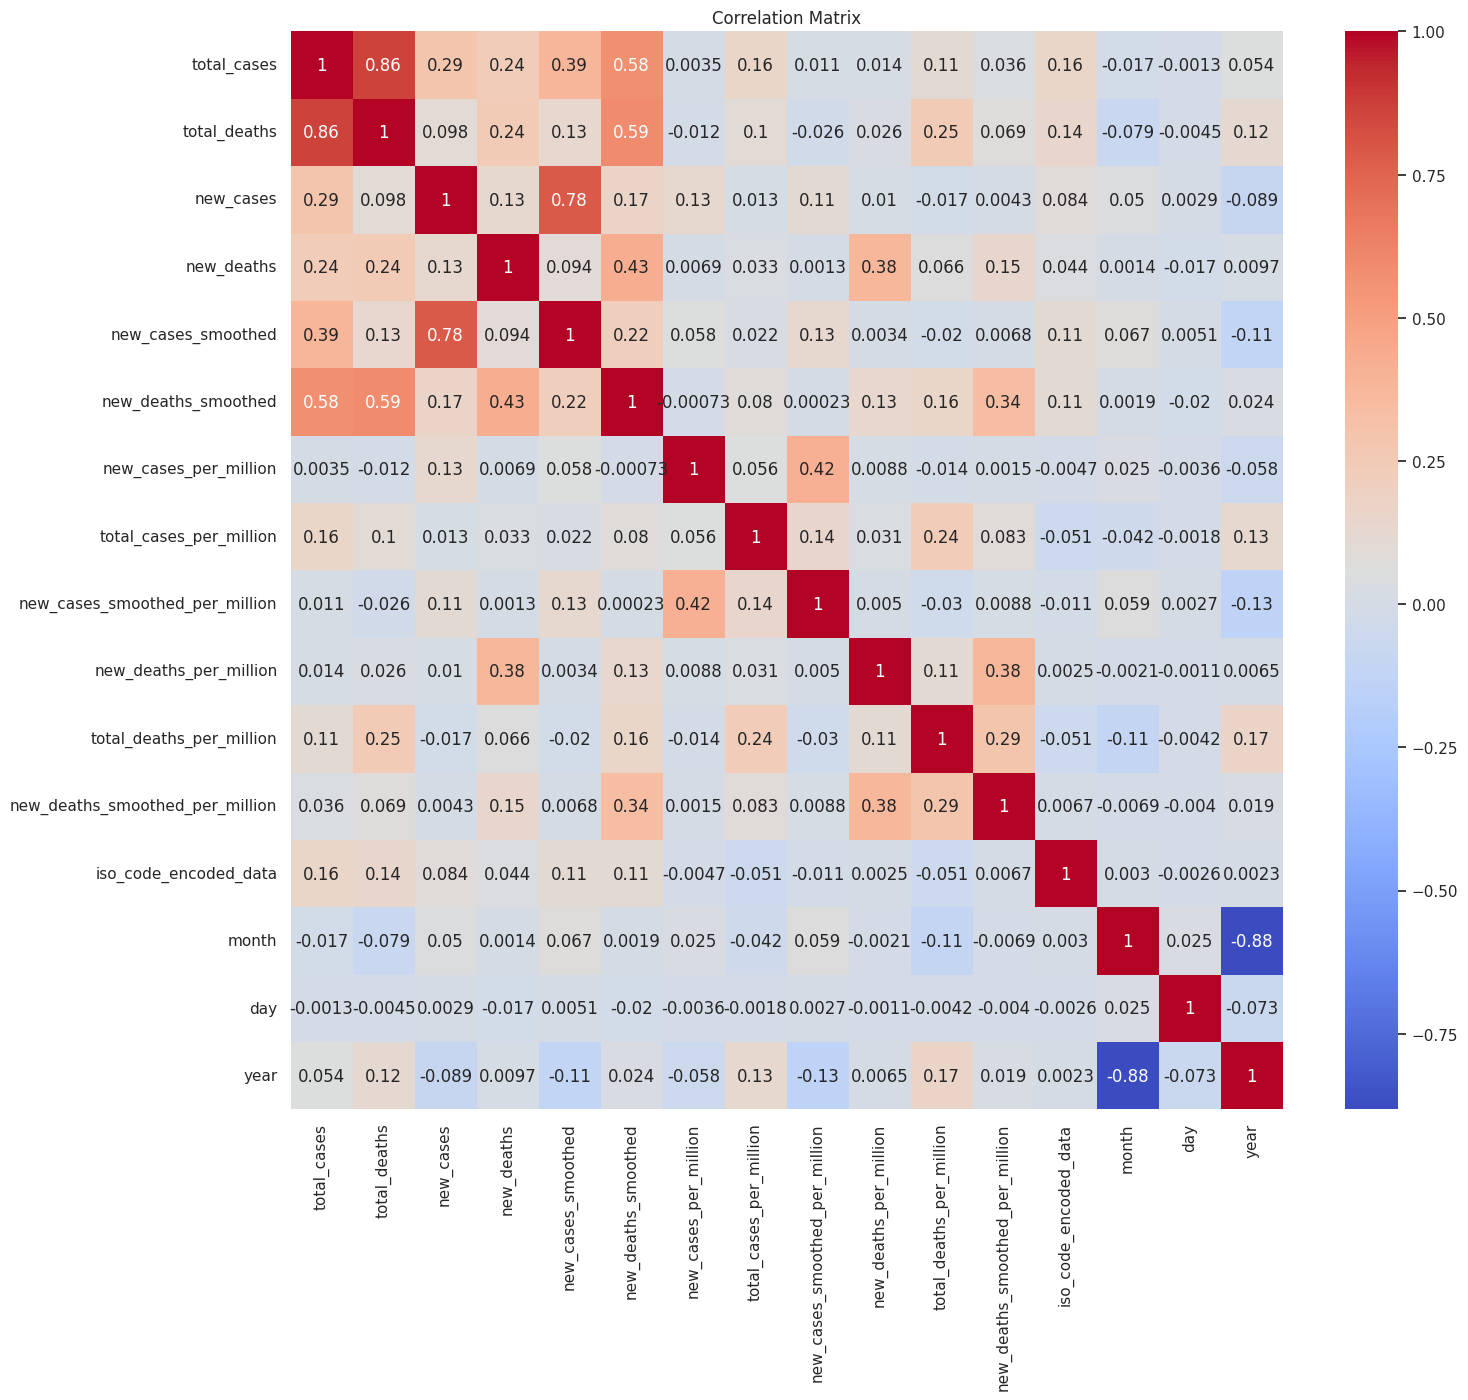

In [ ]:
import seaborn as sns
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

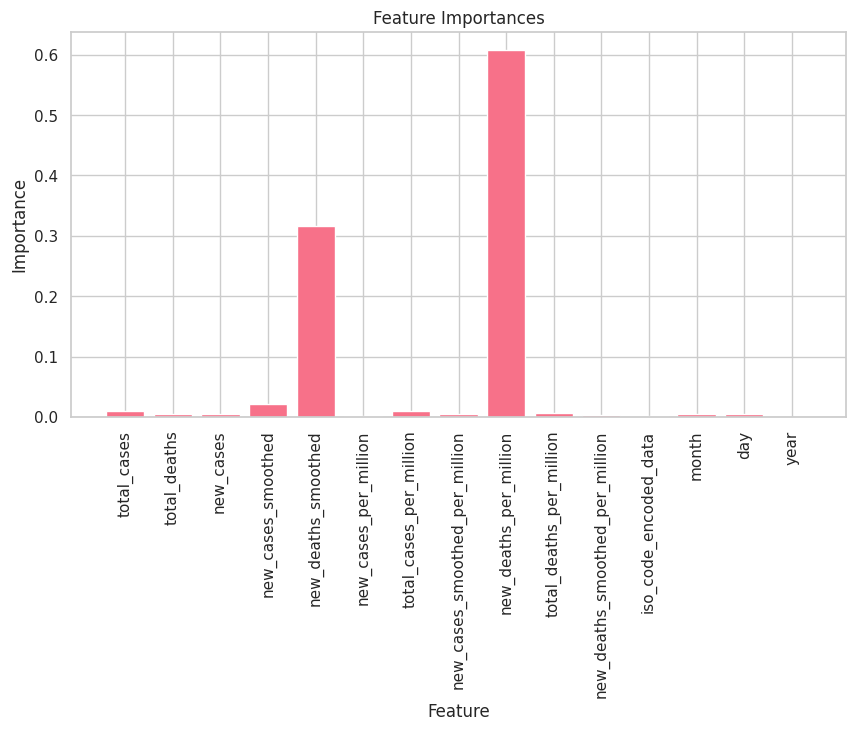

Top feature names:  Index(['new_cases_smoothed_per_million', 'new_cases_smoothed', 'new_deaths',
       'new_cases_per_million', 'total_cases', 'new_deaths_per_million',
       'iso_code_encoded_data', 'total_deaths', 'new_cases'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'data' and 'new_deaths' is the target variable

# Drop the 'new_deaths' column from the data
data = df.drop('new_deaths', axis=1)

# Define your target variable
target = df['new_deaths']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Calculate feature importances
importances = rf_model.feature_importances_

# Visualize feature importances
plt.figure(figsize=(10, 5))
plt.bar(data.columns, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()
# Sort the features by importance in descending order
indices = np.argsort(importances)[::-1]

# Select the top features based on a threshold or a fixed number of features
threshold = 0.05  # You can adjust this threshold based on your needs
top_features_indices = [i for i in range(len(importances)) if importances[indices[i]] >= threshold]
top_features_names = data.columns[indices[top_features_indices]]

# Create a new DataFrame with only the important features
data_important = df[top_features_names]

# Now, you can use 'data_important' for training and testing your model
top_features_indices = indices[:9]
# Map the indices to the corresponding feature names
top_features_names = df.columns[top_features_indices]

# Print the top feature names
print("Top feature names: ", top_features_names)

**Scale the data**

We scale the data so that we can converge the values to a single range of values and it is easier for the models to make the predictions and we get better models.

In [ ]:
from sklearn.preprocessing import StandardScaler

# select columns to be scaled
cols_to_scale = df[top_features_names]

# create StandardScaler object and fit_transform the selected columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cols_to_scale)

# create new DataFrame with scaled data and original column names
scaled_df = pd.DataFrame(scaled_data, columns=top_features_names)
# set target variable
y = df['new_deaths']


In [ ]:
scaled_df

,new_cases_smoothed_per_million,new_cases_smoothed,new_deaths,new_cases_per_million,total_cases,new_deaths_per_million,iso_code_encoded_data,total_deaths,new_cases
0,-0.197431,-0.151981,-0.056746,-0.084713,-0.226004,-0.030382,0.768507,0.034317,-0.122220
1,-0.197431,-0.151981,-0.056746,-0.084713,-0.226004,-0.030382,0.768507,0.034317,-0.122220
2,-0.197431,-0.151981,-0.056746,-0.084713,-0.226004,-0.030382,0.768507,0.034317,-0.122220
3,-0.197431,-0.151981,-0.056746,-0.084713,-0.226004,-0.030382,0.768507,0.034317,-0.122220
4,-0.197431,-0.151981,-0.056746,-0.084713,-0.226004,-0.030382,0.768507,0.034317,-0.122220
...,...,...,...,...,...,...,...,...,...
33663,-0.192359,0.187051,-0.056746,-0.083630,10.099047,-0.030382,0.944605,16.274198,-0.059409
33664,-0.192359,0.187051,-0.056746,-0.084713,10.099047,-0.030382,0.944605,16.274198,-0.122220
33665,-0.192359,0.149313,-0.056746,-0.083630,10.100347,-0.030382,0.944605,16.274198,0.050510
33666,-0.192359,0.097170,-0.056746,-0.084713,10.100347,-0.030382,0.944605,16.274198,-0.122220


**Splitting the data**

we will split the data in such a way that 70% of the data is used for training and 30% is used for testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.25, random_state=42)

In [ ]:
# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25251, 9)
y_train shape: (25251,)
X_test shape: (8417, 9)
y_test shape: (8417,)


Now we will build some machine learning models

**RandomForestRegressor**

Random forest regressor has several advantages over other regression models, including:

1)It can handle both categorical and continuous input features.

2)It can handle missing data and outliers in the input data.

3)It is less prone to overfitting than decision trees.

4)It is a non-parametric model and does not make any assumptions about the distribution of the input data.

In [ ]:
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=42)

# fit the model to the training data
rf_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

# Adjusted R-squared
n = len(y_test)  # number of samples
p = X_test.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)


Mean Absolute Error (MAE): 0.00035105144350718785
Mean Squared Error (MSE): 0.0004186618129975047
Root Mean Squared Error (RMSE): 0.020461227064804903
Mean Absolute Percentage Error (MAPE): 0.8021388888888891
R-squared (R²): 0.9928724373062756
Adjusted R-squared: 0.9928648069905573


**Graphs of visualization for evaluated metrics of RandomForestRegressor**

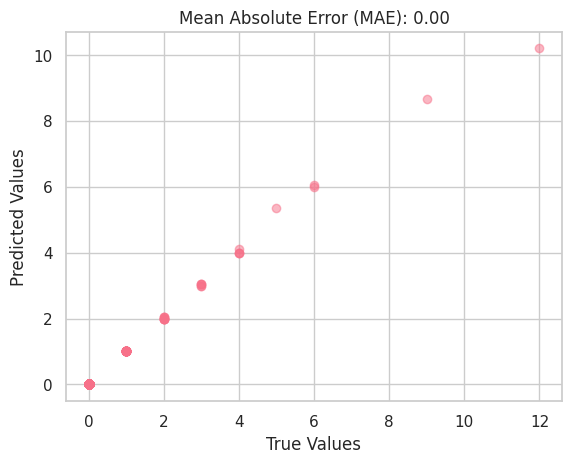

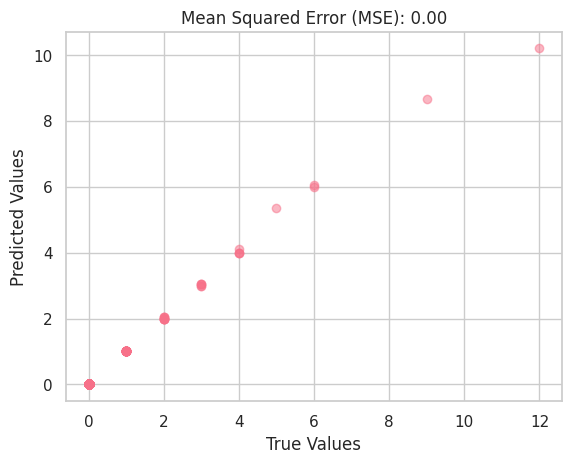

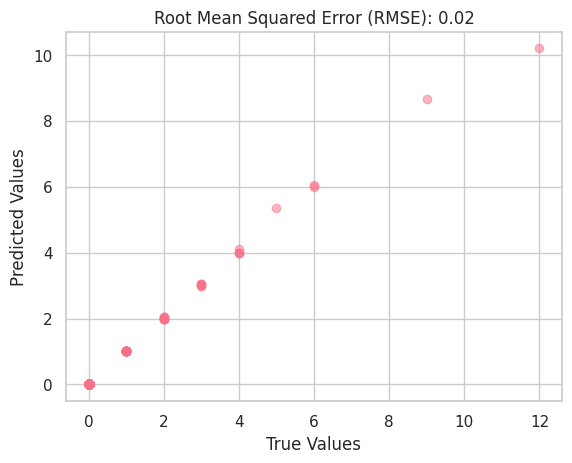

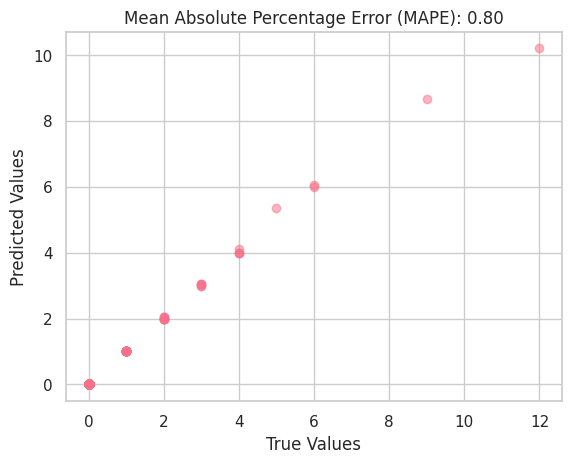

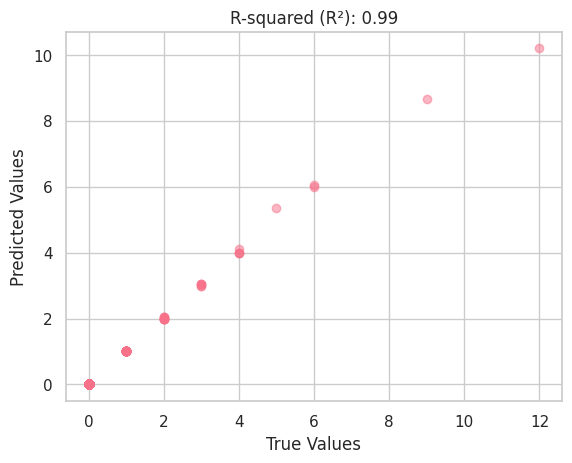

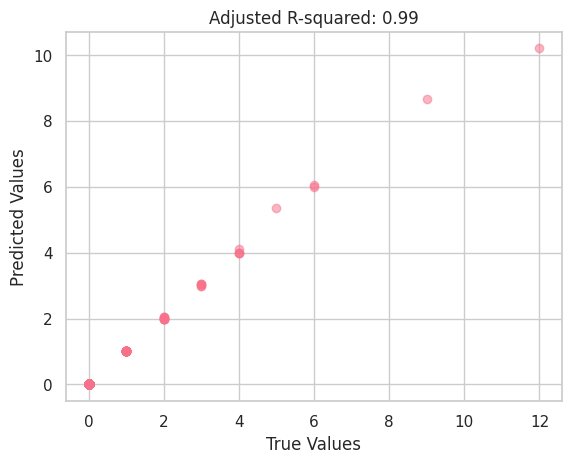

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


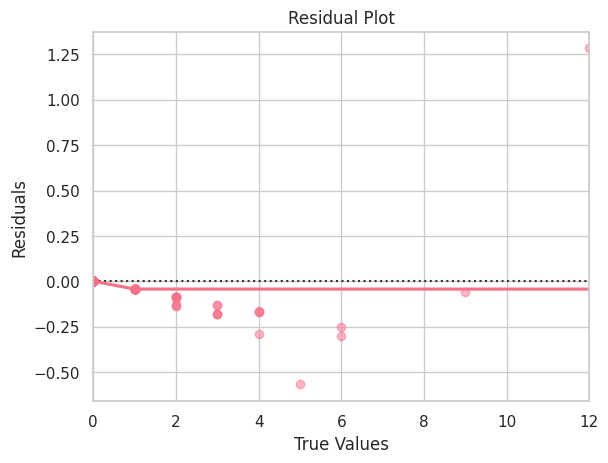

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot a metric
def plot_metric(true, pred, metric_name, metric_value):
    plt.figure()
    plt.scatter(true, pred, alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{metric_name}: {metric_value:.2f}')
    plt.show()

# Plot Mean Absolute Error (MAE)
plot_metric(y_test, y_pred, "Mean Absolute Error (MAE)", mae)

# Plot Mean Squared Error (MSE)
plot_metric(y_test, y_pred, "Mean Squared Error (MSE)", mse)

# Plot Root Mean Squared Error (RMSE)
plot_metric(y_test, y_pred, "Root Mean Squared Error (RMSE)", rmse)

# Plot Mean Absolute Percentage Error (MAPE)
plot_metric(y_test, y_pred, "Mean Absolute Percentage Error (MAPE)", mape)

# Plot R-squared (R²)
plot_metric(y_test, y_pred, "R-squared (R²)", r2)

# Plot Adjusted R-squared
plot_metric(y_test, y_pred, "Adjusted R-squared", adj_r2)

# Residuals plot
residuals = y_test - y_pred
sns.residplot(x=y_test, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


**DecisionTrees**

Decision Trees because they are

1) easy to understand and interpret

2)Handles both categorical and numerical data

3)Non-Parametric

4)Robust to Outliers

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred2 = dt_model.predict(X_test)

In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

# Adjusted R-squared
n = len(y_test)  # number of samples
p = X_test.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)

Mean Absolute Error (MAE): 0.00035105144350718785
Mean Squared Error (MSE): 0.0004186618129975047
Root Mean Squared Error (RMSE): 0.020461227064804903
Mean Absolute Percentage Error (MAPE): 0.8021388888888891
R-squared (R²): 0.9928724373062756
Adjusted R-squared: 0.9928648069905573


**Graphs of visualizations for metrics of DecisionTrees**

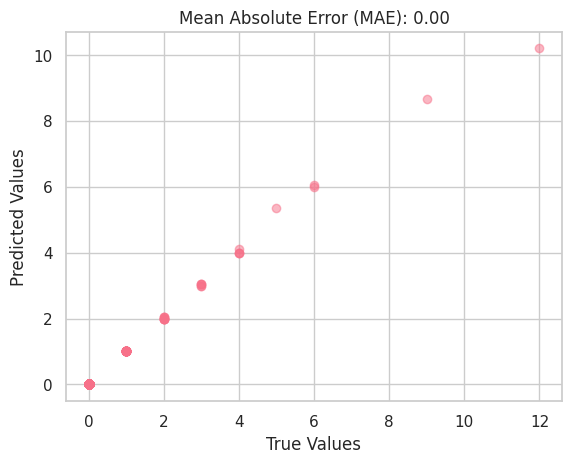

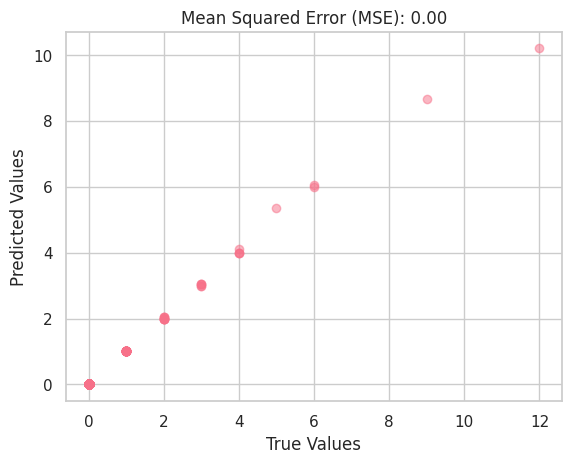

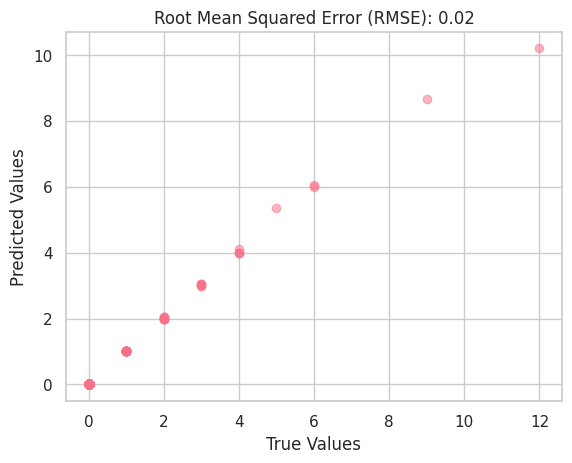

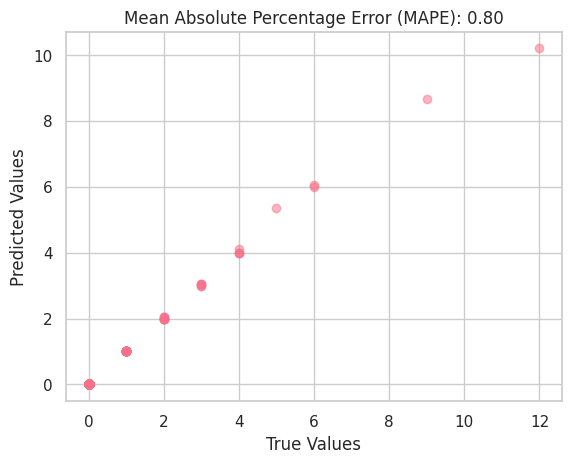

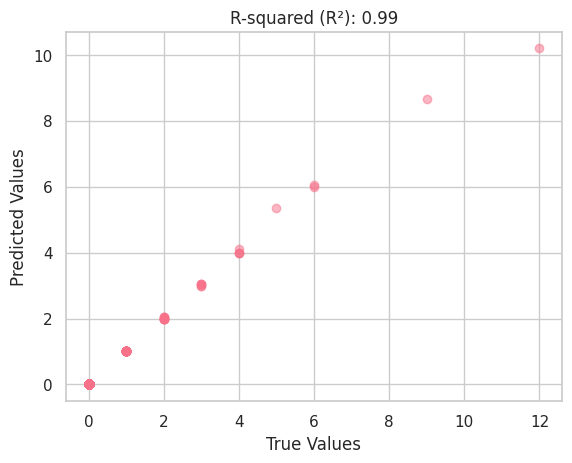

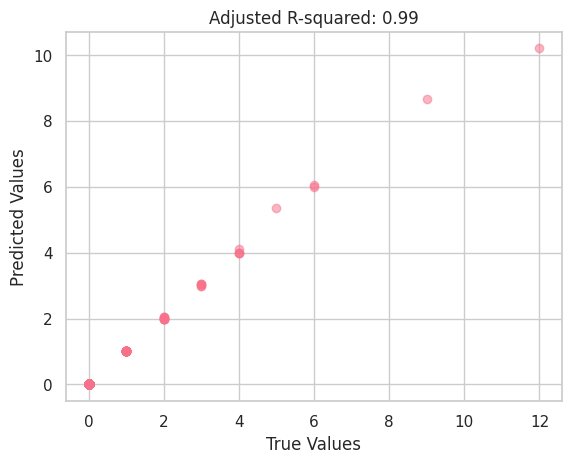

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


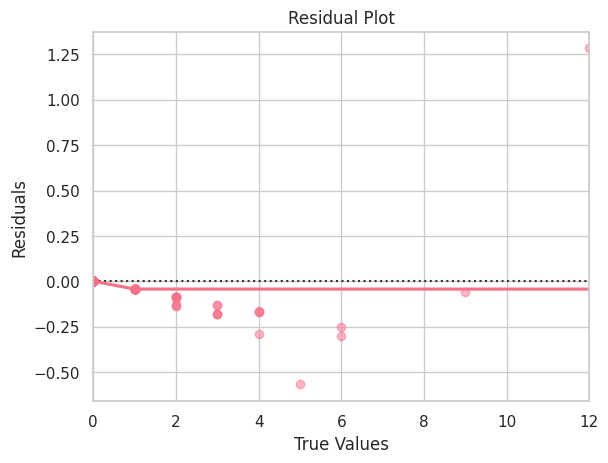

In [ ]:
# Plot Mean Absolute Error (MAE)
plot_metric(y_test, y_pred, "Mean Absolute Error (MAE)", mae)

# Plot Mean Squared Error (MSE)
plot_metric(y_test, y_pred, "Mean Squared Error (MSE)", mse)

# Plot Root Mean Squared Error (RMSE)
plot_metric(y_test, y_pred, "Root Mean Squared Error (RMSE)", rmse)

# Plot Mean Absolute Percentage Error (MAPE)
plot_metric(y_test, y_pred, "Mean Absolute Percentage Error (MAPE)", mape)

# Plot R-squared (R²)
plot_metric(y_test, y_pred, "R-squared (R²)", r2)

# Plot Adjusted R-squared
plot_metric(y_test, y_pred, "Adjusted R-squared", adj_r2)

# Residuals plot
residuals = y_test - y_pred
sns.residplot(x=y_test, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**XGBoosting Algorithm**

In [ ]:
# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1, max_depth=3)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = xgb_model.predict(X_test)

In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

# Adjusted R-squared
n = len(y_test)  # number of samples
p = X_test.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)

Mean Absolute Error (MAE): 1.003499358016999e-06
Mean Squared Error (MSE): 1.217877832272252e-10
Root Mean Squared Error (RMSE): 1.1035750233999735e-05
Mean Absolute Percentage Error (MAPE): inf
R-squared (R²): 0.999999997926608
Adjusted R-squared: 0.9999999979243883


**Graphs for visualization of metrics for XGB**

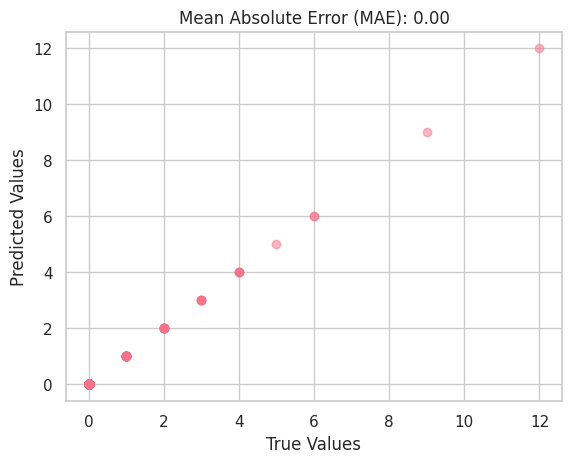

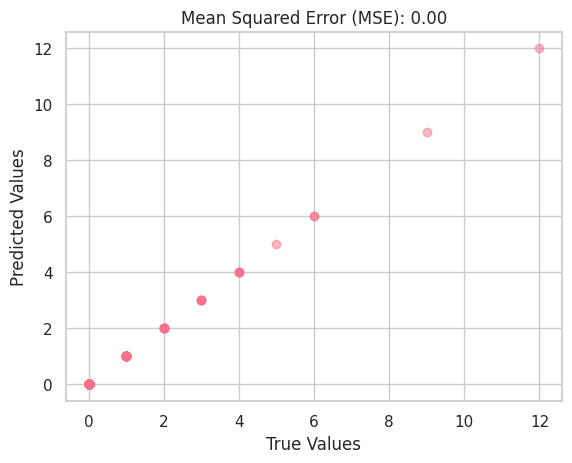

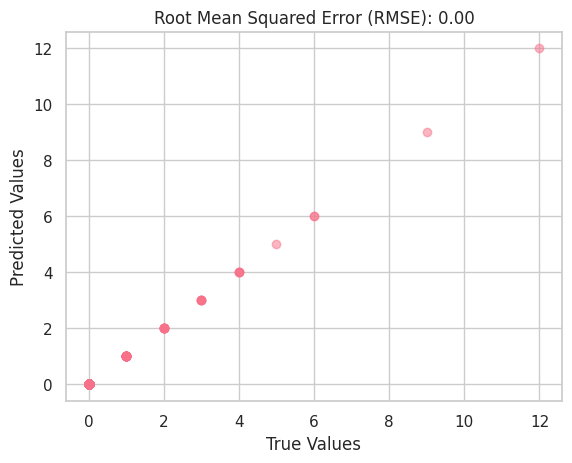

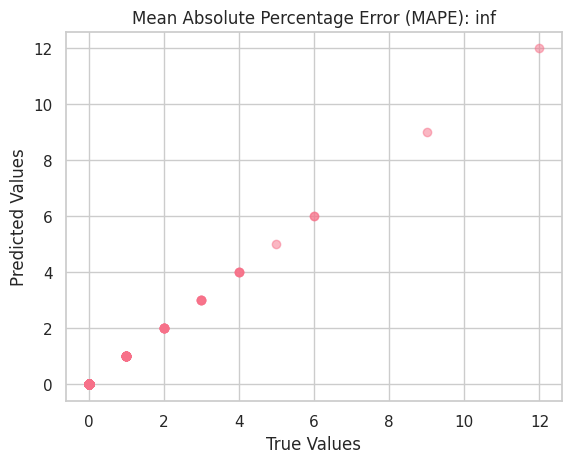

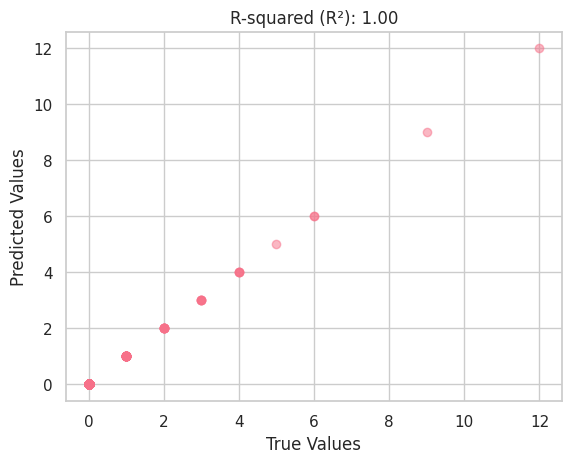

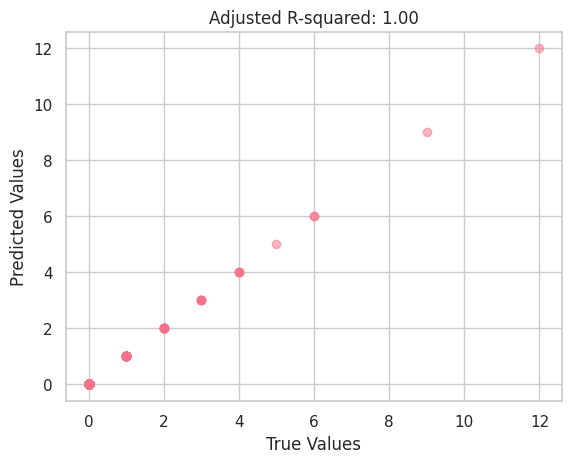

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


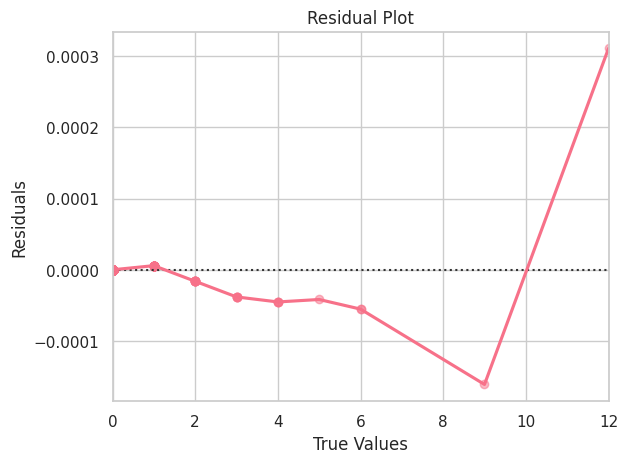

In [ ]:
# Plot Mean Absolute Error (MAE)
plot_metric(y_test, y_pred, "Mean Absolute Error (MAE)", mae)

# Plot Mean Squared Error (MSE)
plot_metric(y_test, y_pred, "Mean Squared Error (MSE)", mse)

# Plot Root Mean Squared Error (RMSE)
plot_metric(y_test, y_pred, "Root Mean Squared Error (RMSE)", rmse)

# Plot Mean Absolute Percentage Error (MAPE)
plot_metric(y_test, y_pred, "Mean Absolute Percentage Error (MAPE)", mape)

# Plot R-squared (R²)
plot_metric(y_test, y_pred, "R-squared (R²)", r2)

# Plot Adjusted R-squared
plot_metric(y_test, y_pred, "Adjusted R-squared", adj_r2)

# Residuals plot
residuals = y_test - y_pred
sns.residplot(x=y_test, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Finding the best parameters using hyperparameter tuning**

We have seen the above models and can say that both decision tree and Random Forest are good models. Let us use Hyperparameter tuning on decision tree and see how the model performs.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid to search over
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Set up cross-validation strategy
cv = 5

# Create the DecisionTree estimator
estimator = DecisionTreeRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv)

# Fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# Extract the best estimator
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, random_state=42)

Now we will take these parameters and build our model

In [ ]:
tuned_model = grid_search.best_estimator_

y_pred = tuned_model.predict(X_test)

In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

# Adjusted R-squared
n = len(y_test)  # number of samples
p = X_test.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)

Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0
R-squared (R²): 1.0
Adjusted R-squared: 1.0


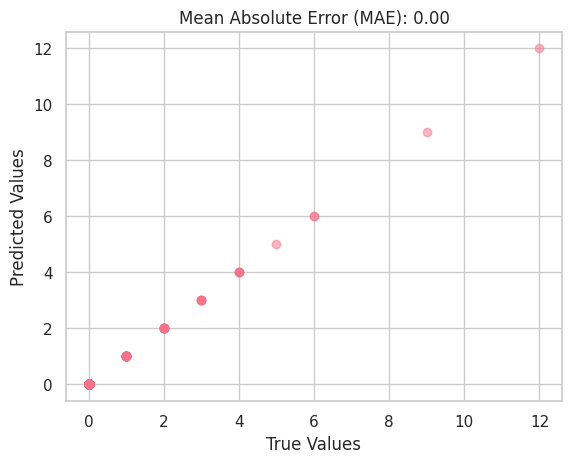

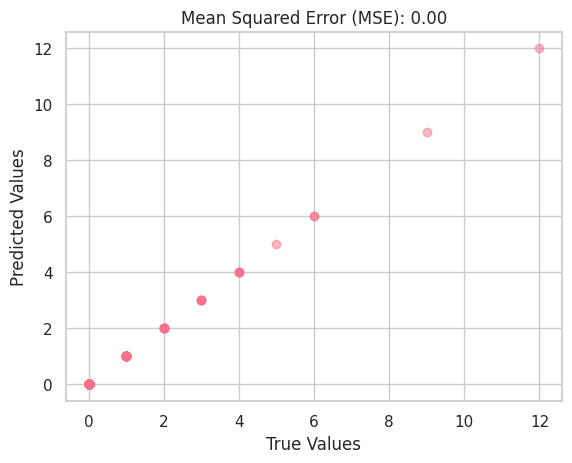

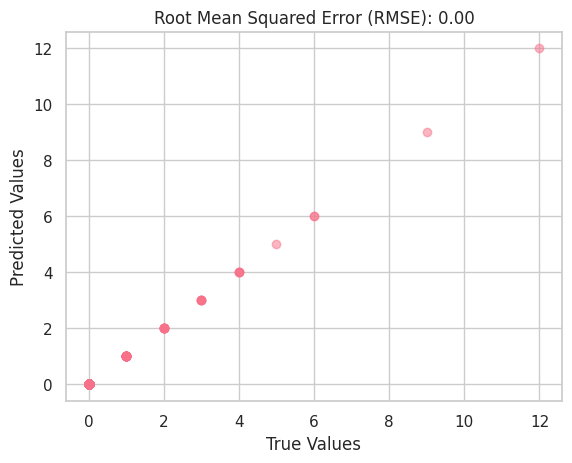

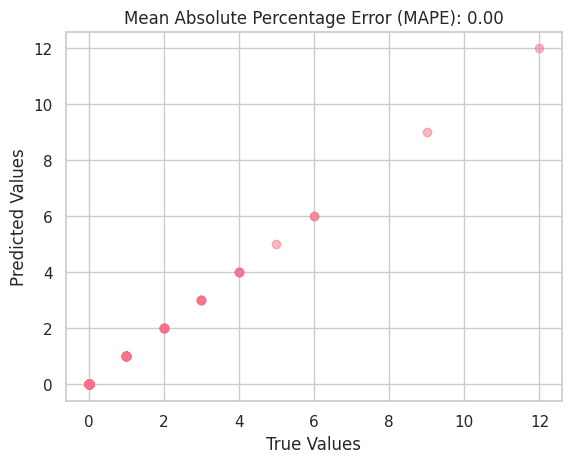

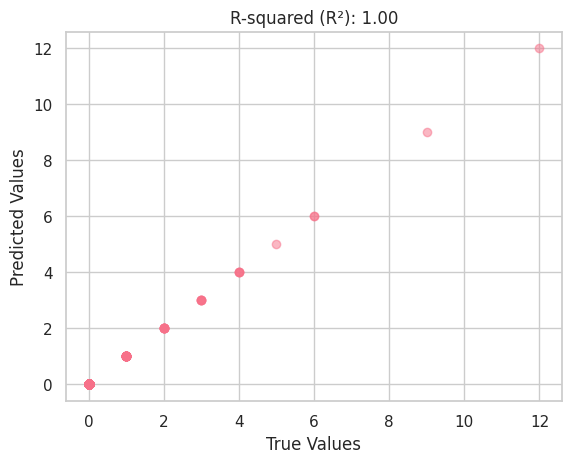

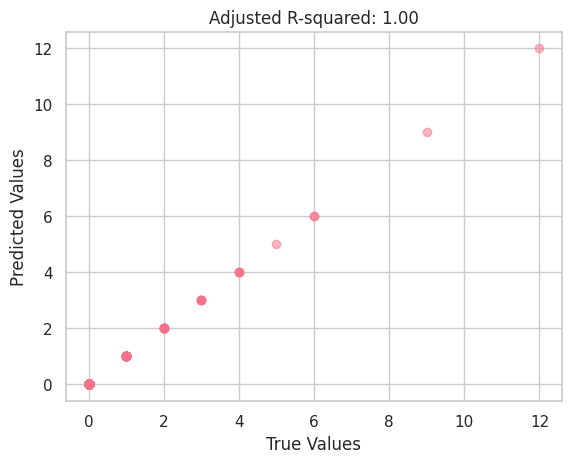

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


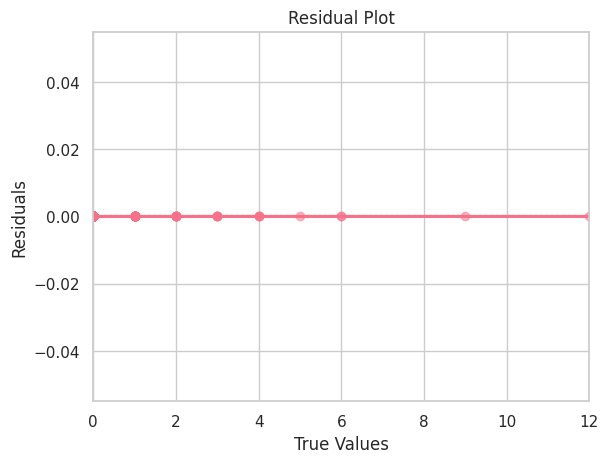

In [ ]:
# Plot Mean Absolute Error (MAE)
plot_metric(y_test, y_pred, "Mean Absolute Error (MAE)", mae)

# Plot Mean Squared Error (MSE)
plot_metric(y_test, y_pred, "Mean Squared Error (MSE)", mse)

# Plot Root Mean Squared Error (RMSE)
plot_metric(y_test, y_pred, "Root Mean Squared Error (RMSE)", rmse)

# Plot Mean Absolute Percentage Error (MAPE)
plot_metric(y_test, y_pred, "Mean Absolute Percentage Error (MAPE)", mape)

# Plot R-squared (R²)
plot_metric(y_test, y_pred, "R-squared (R²)", r2)

# Plot Adjusted R-squared
plot_metric(y_test, y_pred, "Adjusted R-squared", adj_r2)

# Residuals plot
residuals = y_test - y_pred
sns.residplot(x=y_test, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()